In [1]:
path_to_zip_file = "/kaggle/input/quora-question-pairs/train.csv.zip"
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv("/kaggle/working/train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
def preprocess(r):
    r = str(r).lower().strip()
    r = r.replace('%','percent')
    r = r.replace('$','dollar')
    r = r.replace('₹','rupee')
    r = r.replace('€','percent')
    r = r.replace('@','percent')

    r = r.replace('[math]','')
    def simplify_number(text):
        def repl(match):
            num = int(match.group())
            if num >= 1_000_000_000:
                return f'{num//1_000_000_000}b'
            elif num >= 1_000_000:
                return f'{num//1_000_000}m'
            elif num >= 1_000:
                return f'{num//1_000}k'
            return str(num)
        
        return re.sub(r'\b\d{4,}\b', repl, text)
        
    r = simplify_number(r)

    contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
        }

    r_decontracted = []

    for word in r.split():
        if word in contractions:
            word = contractions[word]

        r_decontracted.append(word)
    r = ' '.join(r_decontracted)
    r = r.replace("'ve'","have")
    r = r.replace("n't","not")
    r = r.replace("'re","are")
    r = r.replace("'ll'","will")


    r = BeautifulSoup(r, "html.parser").get_text()

    r = re.sub(r'\W+', ' ', r).strip()

    return r

In [5]:
df['question1'] = df['question1'] .apply(preprocess)
df['question2'] = df['question2'] .apply(preprocess)

In [6]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [7]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

df['common_words'] = df.apply(common_words,axis=1)

In [8]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

df['total_words'] = df.apply(total_words,axis=1)

In [9]:
df['word_share'] = round(df['common_words']/df['total_words'],2)

In [10]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']

    con = 0.00001

    stop_words = stopwords.words("english")

    token_features = [0.0]*8
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])
    
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])

    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + con)
    token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + con)
    token_features[2] = common_stop_count / (min(len(q1_words),len(q2_words)) + con)
    token_features[3] = common_stop_count / (max(len(q1_words),len(q2_words)) + con)
    token_features[4] = common_token_count / (min(len(q1_words),len(q2_words)) + con)
    token_features[5] = common_token_count / (max(len(q1_words),len(q2_words)) + con)
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [11]:
token_features = df.apply(fetch_token_features,axis=1)
df['cwc_min'] = list(map(lambda x: x[0],token_features))
df['cwc_max'] = list(map(lambda x: x[1],token_features))
df['csc_min'] = list(map(lambda x: x[2],token_features))
df['csc_max'] = list(map(lambda x: x[3],token_features))
df['ctc_min'] = list(map(lambda x: x[4],token_features))
df['ctc_max'] = list(map(lambda x: x[5],token_features))
df['last_word_eq'] = list(map(lambda x: x[6],token_features))
df['first_word_eq'] = list(map(lambda x: x[7],token_features))

In [12]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=5589a6ad8a2499349cd70e1acd092d666f5c2f0595e186205716d41ecbdebb2e
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


In [13]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0] * 3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    # Fix logic: should be `or len(q2_tokens) == 0`
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0

    return length_features


In [14]:
length_features = df.apply(fetch_length_features,axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0],length_features))
df['mean_len'] = list(map(lambda x:x[1],length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2],length_features))

In [15]:
!pip install fuzzywuzzy
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.3 MB/s eta 0:00:0000:0100:01


In [16]:
df['question2'].isnull().sum()

0

In [17]:
df.dropna(subset=['question1', 'question2'], inplace=True)

In [18]:
from fuzzywuzzy import fuzz
def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    fuzzy_features = [0.0]*4
    fuzzy_features[0] = fuzz.ratio(q1,q2)
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [19]:
fuzzy_features = df.apply(fetch_fuzzy_features,axis=1)

df['fuzz_ratio'] = list(map(lambda x:x[0],fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x:x[1],fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x:x[2],fuzzy_features))
df['token_set_ratio'] = list(map(lambda x:x[3],fuzzy_features))

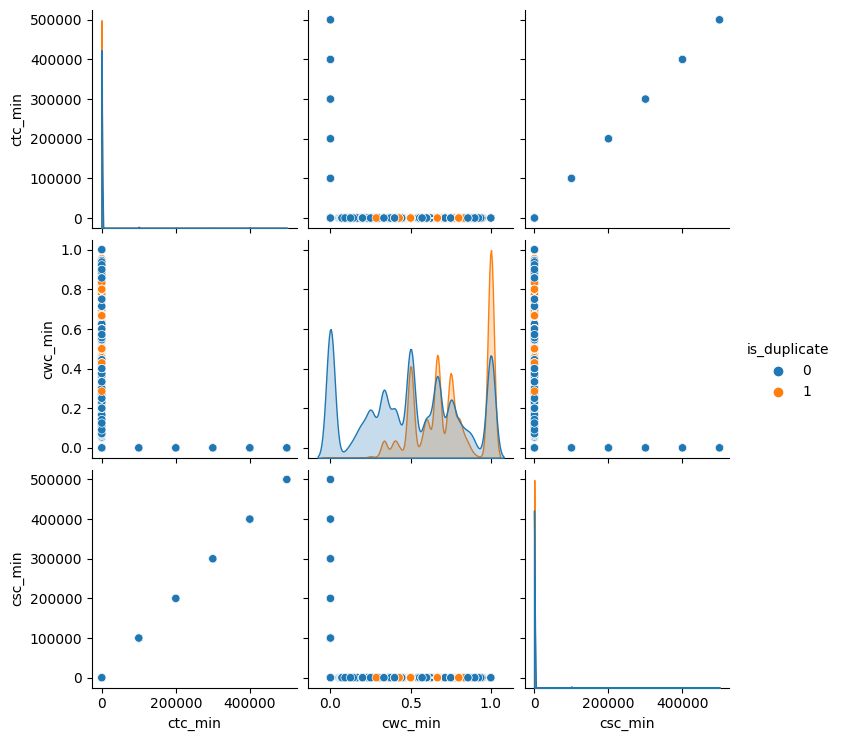

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pairplot(df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue ='is_duplicate')

In [20]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'common_words',
       'total_words', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [21]:
ques_df = df[['question1','question2']]

In [22]:
final_df = df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(404290, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999998,0.833332,...,1.833330,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,0,48,85,10,15,7,24,0.29,0.799998,0.400000,...,0.699999,0.0,1.0,5.0,12.5,0.571429,65,73,63,86
2,0,72,58,14,10,4,24,0.17,0.399999,0.333333,...,0.666666,0.0,1.0,4.0,12.0,0.169492,54,53,66,66
3,0,48,54,11,12,0,20,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.040816,35,38,37,36
4,0,73,38,13,7,4,20,0.20,0.399999,0.200000,...,0.400000,0.0,1.0,6.0,10.0,0.153846,45,55,47,67


In [23]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


sentences = ques_df['question1'].dropna().tolist() + ques_df['question2'].dropna().tolist()
tokenized_sentences = [word_tokenize(str(q).lower()) for q in sentences]

w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=5, min_count=1, workers=4)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
import numpy as np

def get_question_vector(question, model, vector_size=300):
    words = word_tokenize(str(question).lower())
    vecs = [model.wv[word] for word in words if word in model.wv]
    
    if len(vecs) == 0:
        return np.zeros(vector_size)  # fallback if no known words
    
    return np.mean(vecs, axis=0)


In [25]:
ques_df['q1_w2v'] = ques_df['question1'].apply(lambda x: get_question_vector(x, w2v_model))
ques_df['q2_w2v'] = ques_df['question2'].apply(lambda x: get_question_vector(x, w2v_model))

/tmp/ipykernel_31/1677200700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['q1_w2v'] = ques_df['question1'].apply(lambda x: get_question_vector(x, w2v_model))
/tmp/ipykernel_31/1677200700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['q2_w2v'] = ques_df['question2'].apply(lambda x: get_question_vector(x, w2v_model))


In [26]:
ques_df.drop(columns = ['question1','question2'],inplace = True)

/tmp/ipykernel_31/4252799642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.drop(columns = ['question1','question2'],inplace = True)


In [27]:
import numpy as np

def combine_vectors(row):
    q1 = np.array(row['q1_w2v'])
    q2 = np.array(row['q2_w2v'])
    return np.concatenate([q1, q2, np.abs(q1 - q2), (q1 + q2) / 2])  # 1200-dim

ques_df['combined_w2v'] = ques_df.apply(combine_vectors, axis=1)



/tmp/ipykernel_31/574843547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['combined_w2v'] = ques_df.apply(combine_vectors, axis=1)


In [28]:
w2v_array = np.vstack(ques_df['combined_w2v'].values)  # shape: (num_rows, 1200)

w2v_df = pd.DataFrame(w2v_array, columns=[f'w2v_{i}' for i in range(w2v_array.shape[1])])


In [29]:
# Reset index if needed
final_df = final_df.reset_index(drop=True)
w2v_df = w2v_df.reset_index(drop=True)

# Final dataset
final_dataset = pd.concat([final_df, w2v_df], axis=1)


In [30]:
final_dataset.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,w2v_1190,w2v_1191,w2v_1192,w2v_1193,w2v_1194,w2v_1195,w2v_1196,w2v_1197,w2v_1198,w2v_1199
0,0,65,56,14,12,11,23,0.48,0.999998,0.833332,...,0.284118,-0.109734,-0.022100,-0.131240,0.871286,0.317208,-0.104015,0.246723,-0.310204,-0.173542
1,0,48,85,10,15,7,24,0.29,0.799998,0.400000,...,0.239613,0.107490,-0.035954,0.059972,0.494006,0.319358,-0.264475,0.042860,-0.175024,-0.304932
2,0,72,58,14,10,4,24,0.17,0.399999,0.333333,...,0.183848,-0.062080,0.437835,0.387812,0.360791,0.326775,-0.485021,-0.086174,-0.374339,0.093748
3,0,48,54,11,12,0,20,0.00,0.000000,0.000000,...,0.175130,0.583368,0.470165,0.217634,0.533784,0.452528,-0.257413,0.239679,-0.022165,-0.087563
4,0,73,38,13,7,4,20,0.20,0.399999,0.200000,...,0.519496,0.207458,0.225446,0.121532,0.212137,0.612781,-0.173520,-0.591649,0.101975,-0.406293


In [31]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [32]:
X.head()

,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,...,w2v_1190,w2v_1191,w2v_1192,w2v_1193,w2v_1194,w2v_1195,w2v_1196,w2v_1197,w2v_1198,w2v_1199
0,65,56,14,12,11,23,0.48,0.999998,0.833332,1.199998,...,0.284118,-0.109734,-0.022100,-0.131240,0.871286,0.317208,-0.104015,0.246723,-0.310204,-0.173542
1,48,85,10,15,7,24,0.29,0.799998,0.400000,0.599999,...,0.239613,0.107490,-0.035954,0.059972,0.494006,0.319358,-0.264475,0.042860,-0.175024,-0.304932
2,72,58,14,10,4,24,0.17,0.399999,0.333333,0.399999,...,0.183848,-0.062080,0.437835,0.387812,0.360791,0.326775,-0.485021,-0.086174,-0.374339,0.093748
3,48,54,11,12,0,20,0.00,0.000000,0.000000,0.000000,...,0.175130,0.583368,0.470165,0.217634,0.533784,0.452528,-0.257413,0.239679,-0.022165,-0.087563
4,73,38,13,7,4,20,0.20,0.399999,0.200000,0.399999,...,0.519496,0.207458,0.225446,0.121532,0.212137,0.612781,-0.173520,-0.591649,0.101975,-0.406293


In [33]:
from sklearn.model_selection import train_test_split
X_train,y_train,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [34]:
input_shape=(final_dataset.shape[1])
input_shape

1223

In [35]:
(final_dataset.shape[1]-1,)

(1222,)

In [36]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(final_dataset.shape[1],)),)
model.add(BatchNormalization()),
model.add(Dropout(0.3)),
model.add(Dense(256,activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


2025-07-30 10:39:34.708697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753871974.945178      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753871975.010181      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753871986.867858      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/d

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         626,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 760,321 (2.90 MB)

 Trainable params: 759,297 (2.90 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
model.fit(X, y, batch_size=1024, epochs=20, validation_split=0.2)

In [ ]:
model.save('duplicate_question_model.h5')

In [35]:
w2v_model.save("w2v.model")